In [128]:
!pip install numpy


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


1.Data Cleaning

In [129]:
import numpy as np

In [130]:
!pip install pandas


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [131]:
import pandas as pd

In [132]:
df = pd.read_csv('spamcsv.csv')

In [133]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3195,ham,"I av a new number, . Wil u only use this one,ta.",NaN,NaN,NaN
1173,ham,ÌÏ dun need to pick ur gf?,NaN,NaN,NaN
3912,ham,Yeah whatever lol,NaN,NaN,NaN
3168,ham,"Haven't seen my facebook, huh? Lol!",NaN,NaN,NaN
3973,ham,Roger that. We‰Û÷re probably going to rem in a...,NaN,NaN,NaN
3687,ham,I'll meet you in the lobby,NaN,NaN,NaN
4549,ham,\Hey! do u fancy meetin me at 4 at cha åÐ hav ...,NaN,NaN,NaN
515,ham,S:)no competition for him.,NaN,NaN,NaN
572,ham,Can you open the door?,NaN,NaN,NaN
3639,ham,He's really into skateboarding now despite the...,NaN,NaN,NaN


In [134]:
df.shape

(5572, 5)

1.data cleaning

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [136]:
## drop last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(10)

,v1,v2
2074,ham,Yar lor actually we quite fast... Cos da ge sl...
1969,spam,You have won a guaranteed å£200 award or even ...
935,ham,Then dun wear jeans lor...
1544,ham,After completed degree. There is no use in joi...
1521,ham,Are you angry with me. What happen dear
1231,ham,have got * few things to do. may be in * pub l...
1936,ham,My planning usually stops at \find hella weed
2632,ham,I WILL CAL YOU SIR. In meeting
169,ham,Yes :)it completely in out of form:)clark also...
448,ham,LOL ... Have you made plans for new years?


In [137]:
#rename columns
df.rename(columns={'v1':'target','v2':'text'},inplace = True)
df.sample(10)

,target,text
571,ham,Do you know where my lab goggles went
5367,ham,Just trying to figure out when I'm suppose to ...
597,spam,You have an important customer service announc...
3848,ham,U in town alone?
1868,ham,Today my system sh get ready.all is well and i...
2618,ham,Hey pple...$700 or $900 for 5 nights...Excelle...
4101,ham,Ok then i will come to ur home after half an hour
3570,ham,But you dint in touch with me.
4863,ham,Sorry da..today i wont come to play..i have dr...
4880,ham,When/where do I pick you up


In [138]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [139]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [140]:
#tranformed ham for 0 and spam msg for 1
df['target'] = encoder.fit_transform(df['target'])

In [141]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [142]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

#duplicate values
df.duplicated().sum()

In [143]:
 #remove duplicate
df = df.drop_duplicates(keep='first')

In [144]:
df.duplicated().sum()

np.int64(0)

In [145]:
df.shape

(5169, 2)

2.EDA (Exploratary data anyalysis)

In [146]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [147]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [148]:
!pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


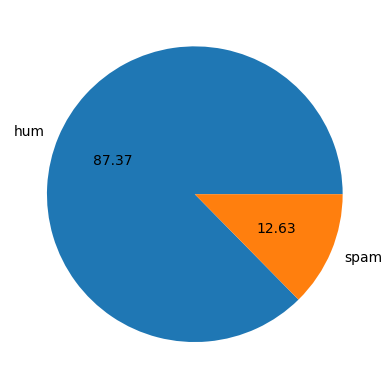

In [149]:
#pie chart
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['hum','spam'],autopct="%0.2f")
plt.show()

In [150]:
#data is imbalnced
import nltk



In [151]:
!pip install nltk


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [152]:
import nltk


In [153]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sumiti08\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [154]:
#counting the no of characters from text columns
df['num_character'] = df['text'].apply(len)

In [155]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [156]:
# counting num of words by applying lambda functon on text column 
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [157]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [158]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [159]:
df.head()


,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [160]:
df[['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [161]:
#describtion of columns for ham msg
df[df['target'] == 0][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [162]:
#describtion of columns for spam msg
df[df['target'] == 1][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [163]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [164]:
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

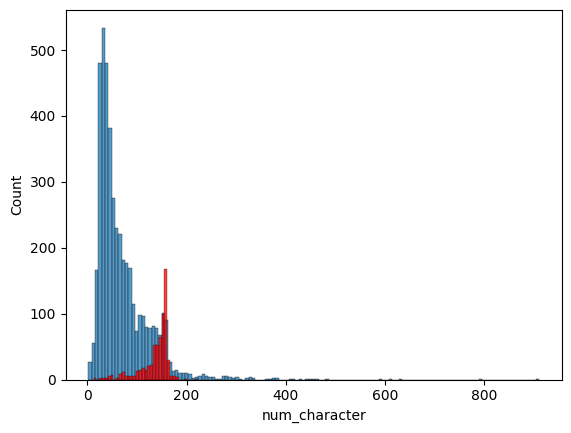

In [165]:
#histogram of no characters from ham and spam msg
sns.histplot(df[df['target'] == 0]['num_character'])
sns.histplot(df[df['target'] == 1]['num_character'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

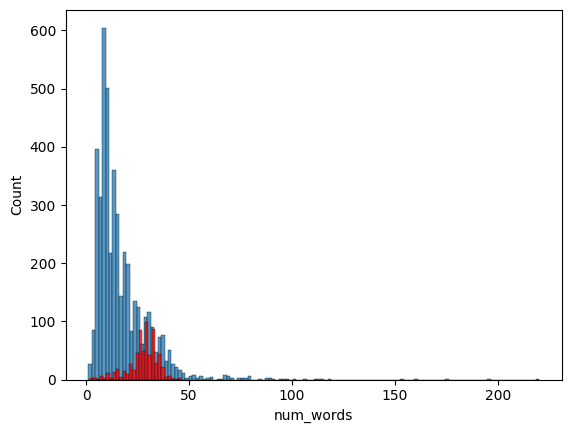

In [166]:
#histogram of no words from ham and spam msg
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

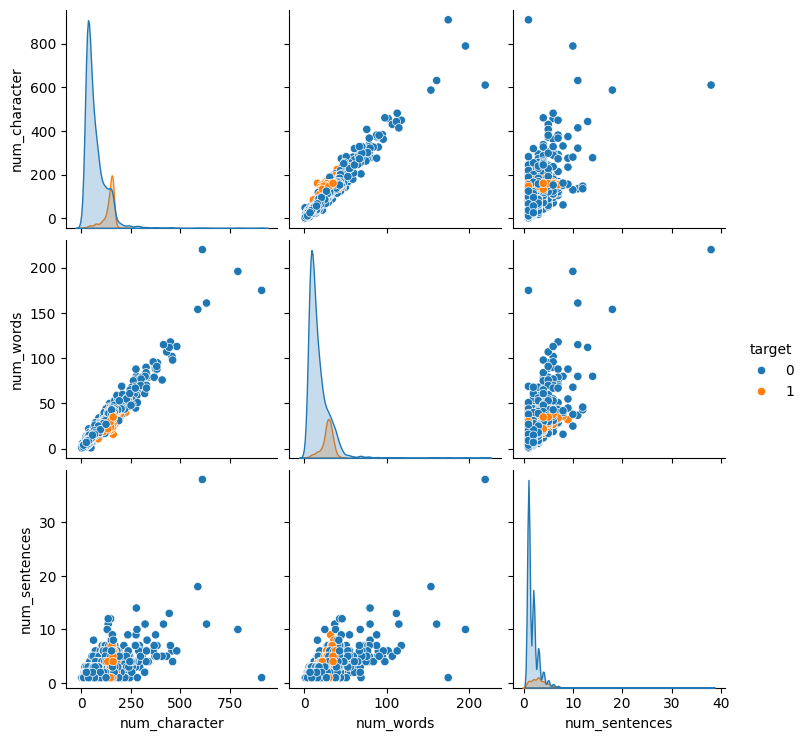

In [167]:
sns.pairplot(df,hue='target')

In [168]:
#cooreltion between all columns
df.corr(numeric_only=True)

,target,num_character,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_character,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

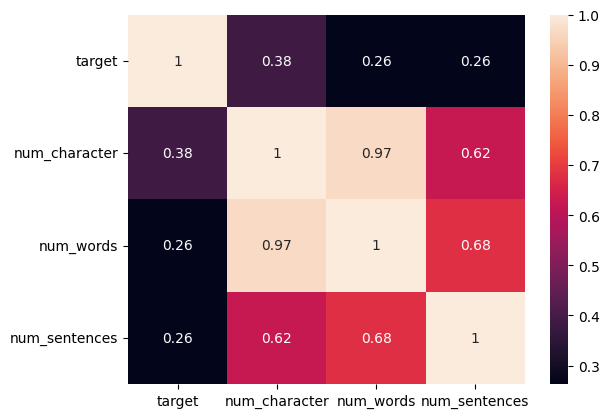

In [169]:
#heatmap from cooreltion
sns.heatmap(df.corr(numeric_only=True),annot=True)

3.data preprocessing
lower case
tokenization
removing special characters
removing stop word and punctuations
stemming


In [170]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sumiti08\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [171]:
from nltk.corpus import stopwords

In [172]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [173]:
import string

In [174]:
#funtion to lower case data,remove stop words and punctuation,and stem it
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[ : ]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
            
    return "  ".join(y)

In [175]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [176]:
transform_text('did you Like ? my presentation')

'like  present'

In [177]:
transform_text('hey sumiti where u have been ?')

'hey  sumiti  u'

In [178]:
transform_text('I Loved Lectures on Machine Learning. How about you?')

'love  lectur  machin  learn'

In [179]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [180]:
transform_text('Im gonna be home soon and i dont want to talk about this stuff anymore tonight, k? Ive cried enough today.')

'im  gon  na  home  soon  dont  want  talk  stuff  anymor  tonight  k  ive  cri  enough  today'

In [181]:
df['transformed_text'] = df['text'].apply(transform_text)

In [182]:
df.head()

,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [183]:
!pip install wordcloud



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [184]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [185]:
#wordclound of spam msg
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

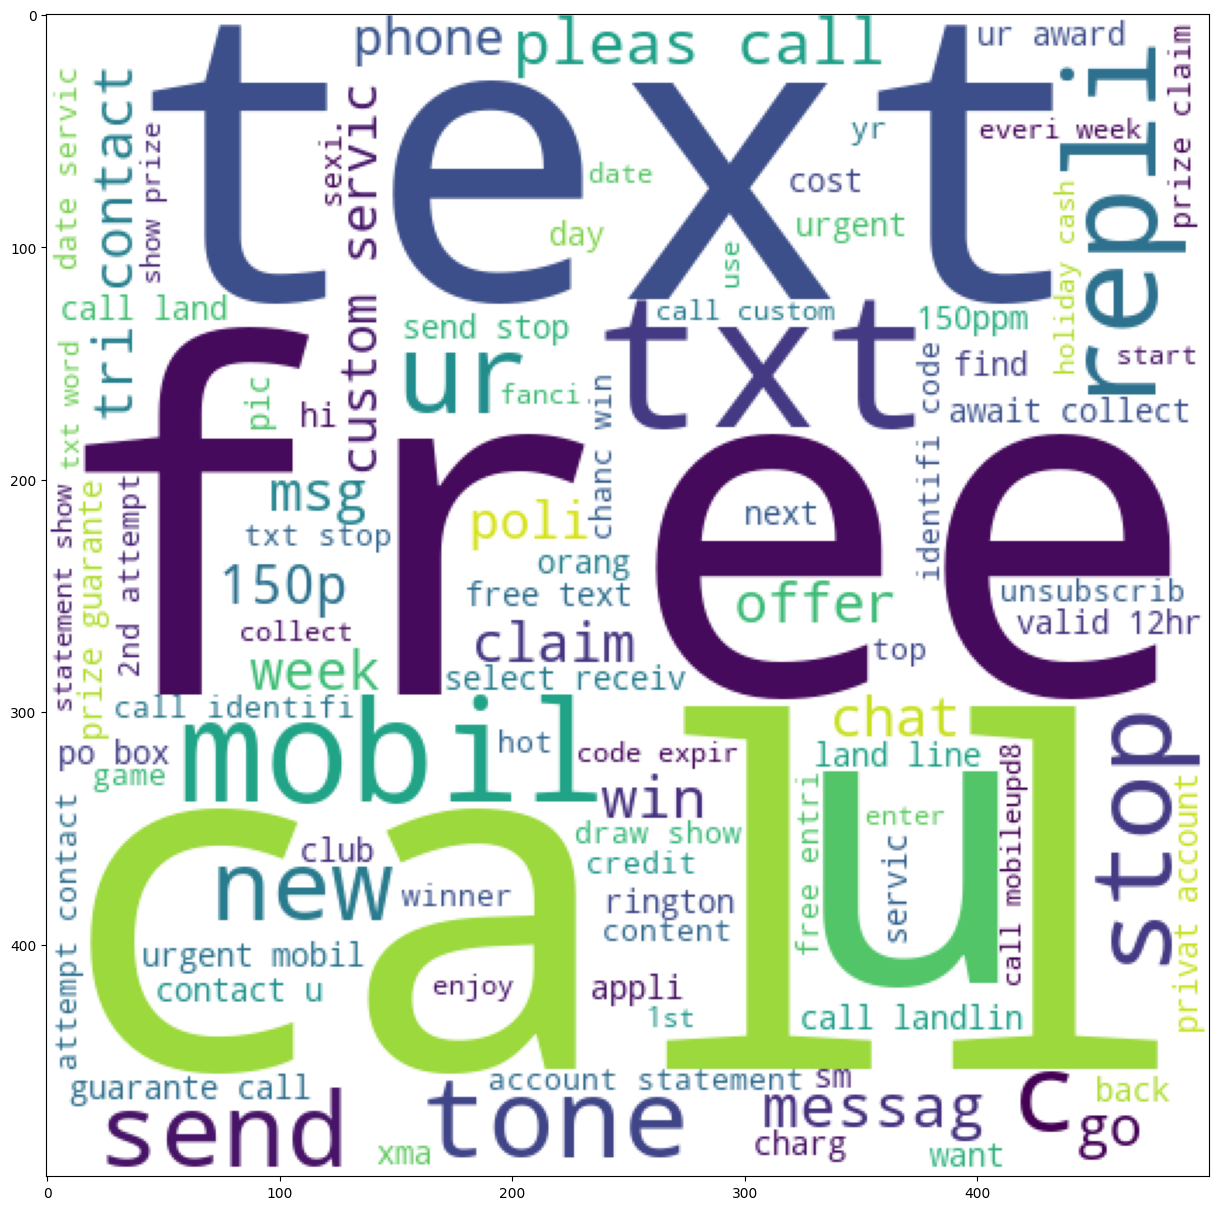

In [186]:
plt.figure(figsize=(15,60))
plt.imshow(spam_wc)

In [187]:
#wordcloud of ham msg
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

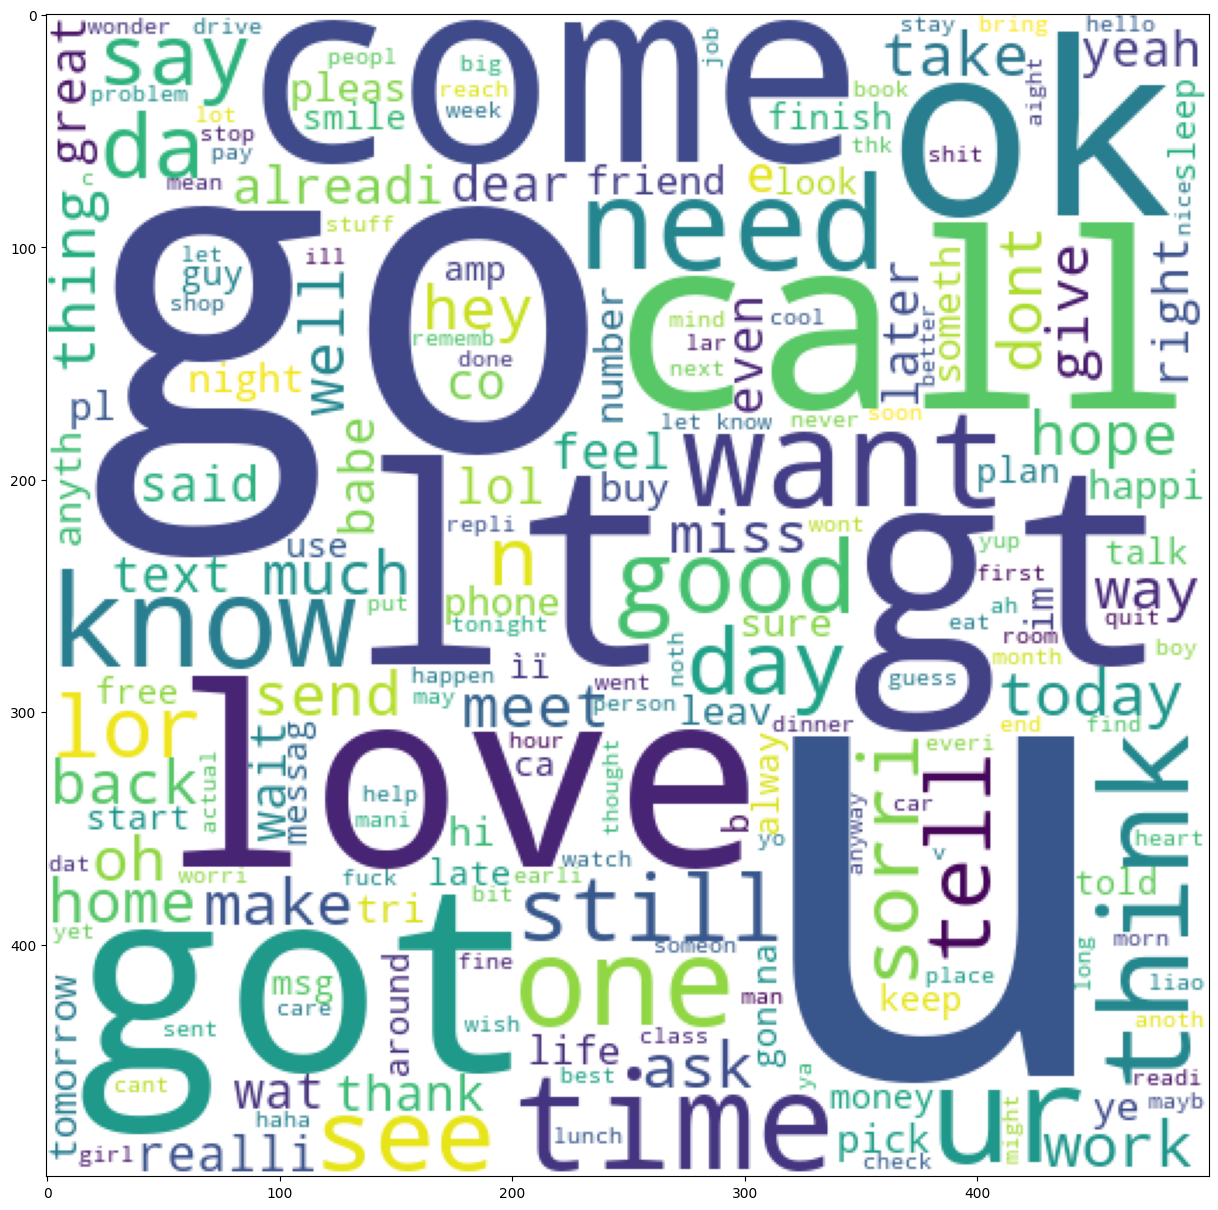

In [188]:
plt.figure(figsize=(15,60))
plt.imshow(ham_wc)

In [189]:
# to find the repeted words from spam msg
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [190]:
len(spam_corpus)

9939

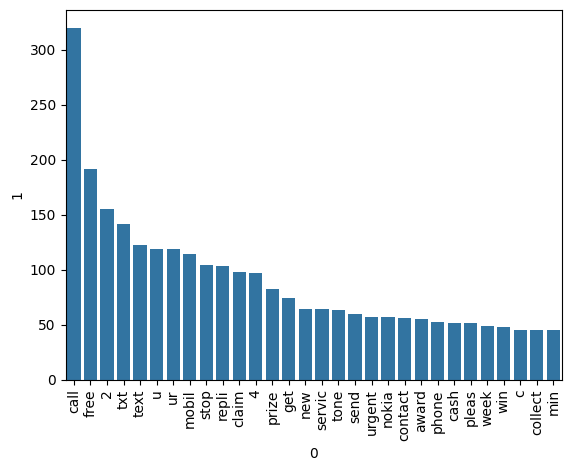

In [191]:
# to find most repeated word from spam msg
from collections import Counter
data = (pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
sns.barplot(x=data[0], y=data[1])
plt.xticks(rotation='vertical')
plt.show()
             

In [192]:
# to find the repeted words from ham msg
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [193]:
len(ham_corpus)

35404

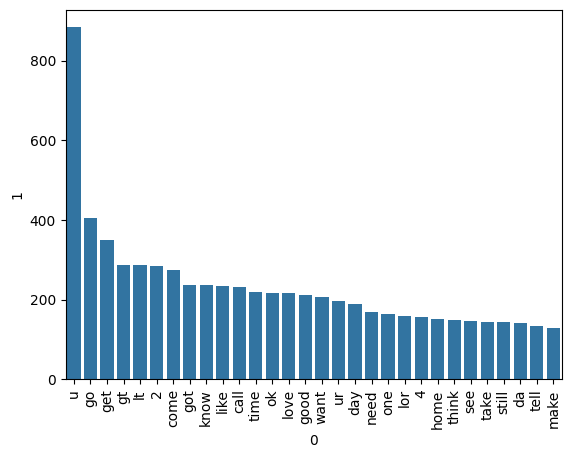

In [194]:
# to find most repeated word from ham msg
from collections import Counter
data = (pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
sns.barplot(x=data[0], y=data[1])
plt.xticks(rotation='vertical')
plt.show()

4.model building

In [195]:
#text vectorization
#using bag of words


In [196]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [197]:
x = cv.fit_transform(df['transformed_text']).toarray()

In [198]:
x.shape

(5169, 6708)

In [199]:
y = df['target'].values

In [200]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [203]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [204]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [205]:
gnb.fit(x_train,y_train)
y_predict1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_predict1))
print(confusion_matrix(y_test,y_predict1))
print(precision_score(y_test,y_predict1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [206]:
mnb.fit(x_train,y_train)
y_predict2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_predict2))
print(confusion_matrix(y_test,y_predict2))
print(precision_score(y_test,y_predict2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [207]:
bnb.fit(x_train,y_train)
y_predict3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_predict3))
print(confusion_matrix(y_test,y_predict3))
print(precision_score(y_test,y_predict3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [208]:
#using tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [209]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [210]:
x.shape

(5169, 6708)

In [211]:
y = df['target'].values


In [212]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [215]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [216]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [217]:
gnb.fit(x_train,y_train)
y_predict1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_predict1))
print(confusion_matrix(y_test,y_predict1))
print(precision_score(y_test,y_predict1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [218]:
mnb.fit(x_train,y_train)
y_predict2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_predict2))
print(confusion_matrix(y_test,y_predict2))
print(precision_score(y_test,y_predict2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [219]:
bnb.fit(x_train,y_train)
y_predict3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_predict3))
print(confusion_matrix(y_test,y_predict3))
print(precision_score(y_test,y_predict3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [220]:
# we are choosing tfidf--> mnb as its not giving any false positive values and have high precision score

In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
!pip install xgboost
from xgboost import XGBClassifier




[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [222]:
# creating objects
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='liblinear',penalty='11')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [223]:
#creating dictionary of algoritham name and their objects
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'MNB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'XgB' : xgb,
}



In [224]:
#function to calculate acurracy and precision of training data
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_predict = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_predict)
    precision = precision_score(y_test,y_predict)
    
    return accuracy,precision

In [225]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [226]:
#calculating accuracy and precision for all algorithms using loop
accuracy_score = []
precision_score = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
    
    print("for ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_score.append(current_accuracy)
    precision_score.append(current_precision)
    

TypeError: 'list' object is not callable

In [227]:
accuracy_score = []
precision_score = []

for name, clf in clfs.items():
    
    # Get accuracy and precision from train_classifier
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    
    # Check if the returned values are numeric
    if not isinstance(current_accuracy, (int, float)) or not isinstance(current_precision, (int, float)):
        print(f"Error: train_classifier returned non-numeric values for {name}.")
        continue  # Skip this iteration if the values are not numeric
    
    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)

    accuracy_score.append(current_accuracy)
    precision_score.append(current_precision)


TypeError: 'list' object is not callable

In [228]:
# Ensure `train_classifier` is defined as a function
def train_classifier(clf, x_train, y_train, x_test, y_test):
    # Some code that returns accuracy and precision
    return accuracy, precision

# Now you can use it in the loop
accuracy_score = []
precision_score = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    
    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)

    accuracy_score.append(current_accuracy)
    precision_score.append(current_precision)


NameError: name 'accuracy' is not defined

In [ ]:
#converting into dataframe
